In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize 
import nltk
import numpy as np

In [ ]:
filename='/content/drive/MyDrive/data/일과직업.json'

In [ ]:
with open(filename, "r", encoding="utf8") as f: 
    json_data = json.load(f)
datas = json_data['data']

In [ ]:
datas[0]['body'][0]

{'date': '2020-10-07',
 'participantID': 'P01',
 'time': '13:18:00',
 'turnID': 'T1',
 'utterance': '여러 명 같이 하나보네?',
 'utteranceID': 'U1'}

In [ ]:
datas[0]['header']['participantsInfo']

[{'age': '20대',
  'gender': '여성',
  'participantID': 'P01',
  'residentialProvince': '광주광역시'},
 {'age': '20대',
  'gender': '여성',
  'participantID': 'P02',
  'residentialProvince': '서울특별시'}]

In [ ]:
txt =[]
date=[]
time=[]
user=[]
for i in range(0,76200):
    for text in datas[i]['body'] :
        txt.append(text['utterance'])
        date.append(text['date'])
        time.append(text['time'])
        user.append(text['utteranceID'])

txt[1:10]
date[1:10]
time[1:10]
user[1:10]

['U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10']

In [ ]:
gender=[]

for i in range(0,76200):
    for tex in datas[i]['header']['participantsInfo'] :
        gender.append(tex['gender'])

gender[0:10]

['여성', '여성', '여성', '여성', '남성', '여성', '여성', '여성', '여성', '여성']

In [ ]:
#kakao = pd.DataFrame({'date':date,
#                      'time':time,
#                      'message':txt,
#                      'user':user})

In [ ]:
# kakao.head()

In [ ]:
dic = {'date':date,
       'time':time,
       'message':txt,
       'user':user,
       'gender':gender}

res = pd.DataFrame.from_dict(dic,orient='index')
kakao = res.transpose()

In [ ]:
kakao.head(10)

,date,time,message,user,gender
0,2020-10-07,13:18:00,여러 명 같이 하나보네?,U1,여성
1,2020-10-07,13:18:00,#@이모티콘#,U2,여성
2,2020-10-07,13:19:00,응 한 10명?,U3,여성
3,2020-10-07,13:19:00,프로그램 다운이 안 됐대,U4,여성
4,2020-10-07,13:19:00,아,U5,남성
5,2020-10-07,13:19:00,강제로 쉬는 시간,U6,여성
6,2020-10-07,13:20:00,평일엥 일하겠네 우리 #@이름#,U7,여성
7,2020-10-07,13:20:00,평일엔...,U8,여성
8,2020-10-07,14:15:00,다음 주부터는,U9,여성
9,2020-10-07,14:15:00,바쁘겠다,U10,여성


In [ ]:
kakao.tail(10)

,date,time,message,user,gender
1166083,2020-08-03,16:13:00,내년에 31라고 해야겠다,U8,None
1166084,2020-08-03,16:13:00,정정합니다,U9,None
1166085,2020-08-03,16:13:00,ㅋㅋㅋㅋㅋㅋ,U10,None
1166086,2020-08-03,16:13:00,올해 30살이요,U11,None
1166087,2020-08-03,16:13:00,과장님들이,U12,None
1166088,2020-08-03,16:13:00,밖에서 은근슬쩍,U13,None
1166089,2020-08-03,16:13:00,#@이름#씨,U14,None
1166090,2020-08-03,16:13:00,말놓는다,U15,None
1166091,2020-08-03,16:13:00,오 둘이 동갑이야~? 이러면,U16,None
1166092,2020-08-03,16:13:00,아뇨? 저 30살인데요!,U17,None


In [ ]:
kakao['gender'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1166088     True
1166089     True
1166090     True
1166091     True
1166092     True
Name: gender, Length: 1166093, dtype: bool

In [ ]:
kakao['gender'] = kakao['gender'].fillna('남성') 

In [ ]:
kakao['gender'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1166088    False
1166089    False
1166090    False
1166091    False
1166092    False
Name: gender, Length: 1166093, dtype: bool

In [ ]:
corpus = kakao['message']
corpus

0            여러 명 같이 하나보네?
1                  #@이모티콘#
2                 응 한 10명?
3            프로그램 다운이 안 됐대
4                        아
                ...       
1166088           밖에서 은근슬쩍
1166089             #@이름#씨
1166090               말놓는다
1166091    오 둘이 동갑이야~? 이러면
1166092      아뇨? 저 30살인데요!
Name: message, Length: 1166093, dtype: object

In [ ]:
total_tokens = [token for msg in corpus for token in str(msg).split()]
print(len(total_tokens))

3107562


In [ ]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

963211
[('근데', 22575), ('나', 18377), ('진짜', 17420), ('아', 16671), ('내가', 13337), ('다', 13323), ('오늘', 12987), ('ㅋㅋㅋ', 11479), ('그냥', 10936), ('ㅋㅋ', 10463)]


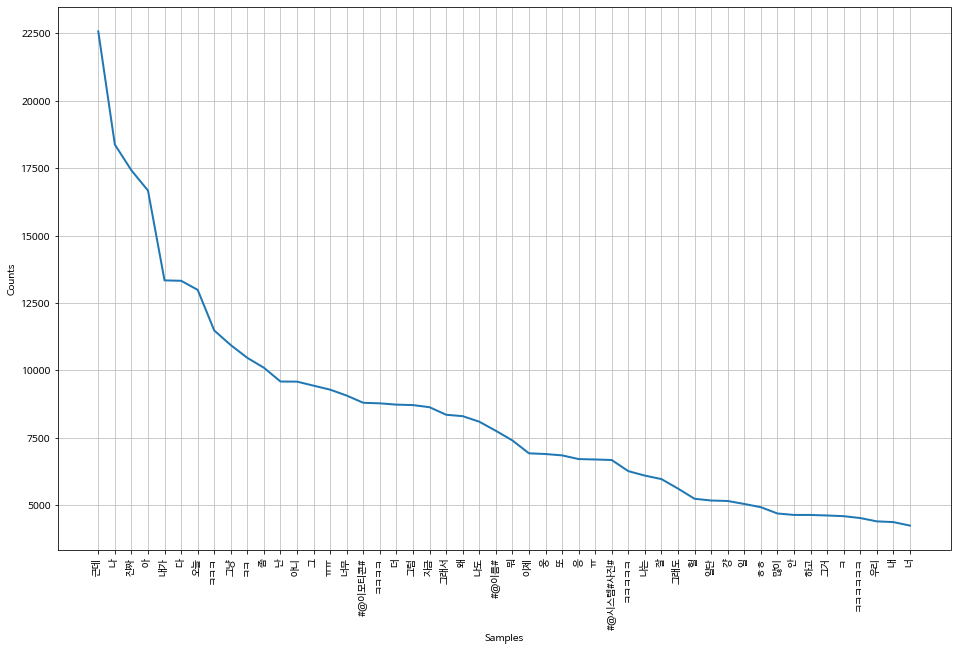

In [ ]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline


plt.rc('font',family='NanumBarunGothic')
plt.figure(figsize=(16,10))
text.plot(50)

데이터 정제


In [ ]:
import re

def message_cleaning(docs):
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in docs]
    
    # 1
    pattern1 = re.compile("사진|이모티콘")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 2
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):

  SW = set()

  with open(path) as f:
    for word in f:
      SW.add(word)
  
  return SW

def text_tokenizing(doc):
  return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

  # wordcloud용 명사 추출
  # return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [ ]:
SW = define_stopwords("/content/drive/MyDrive/data/stopwords-ko.txt")

cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

1166093
['여러 명 같이 하나보네', '', '응 한 10명', '프로그램 다운이 안 됐대', '아', '강제로 쉬는 시간', '평일엥 일하겠네 우리 이름', '평일엔', '다음 주부터는', '바쁘겠다']


In [ ]:
cleaned_text = pd.Series(cleaned_corpus)
kakao["message"] = cleaned_text
cleaned_data = kakao[kakao["message"] != ""]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103809 entries, 0 to 1166092
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   date     1103809 non-null  object
 1   time     1103809 non-null  object
 2   message  1103809 non-null  object
 3   user     1103809 non-null  object
 4   gender   1103809 non-null  object
dtypes: object(5)
memory usage: 50.5+ MB


In [ ]:
cleaned_data.head()

,date,time,message,user,gender
0,2020-10-07,13:18:00,여러 명 같이 하나보네,U1,여성
2,2020-10-07,13:19:00,응 한 10명,U3,여성
3,2020-10-07,13:19:00,프로그램 다운이 안 됐대,U4,여성
4,2020-10-07,13:19:00,아,U5,남성
5,2020-10-07,13:19:00,강제로 쉬는 시간,U6,여성


정제 데이터 저장

In [ ]:
import pickle

with open("cleaned_data.pk", "wb") as f:
  pickle.dump(cleaned_data, f)

데이터 불러오기

In [ ]:
from pprint import pprint

In [ ]:
with open("/content/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         date      time        message user gender
0  2020-10-07  13:18:00   여러 명 같이 하나보네   U1     여성
1  2020-10-07  13:19:00        응 한 10명   U3     여성
2  2020-10-07  13:19:00  프로그램 다운이 안 됐대   U4     여성
3  2020-10-07  13:19:00              아   U5     남성
4  2020-10-07  13:19:00      강제로 쉬는 시간   U6     여성
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103809 entries, 0 to 1103808
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   date     1103809 non-null  object
 1   time     1103809 non-null  object
 2   message  1103809 non-null  object
 3   user     1103809 non-null  object
 4   gender   1103809 non-null  object
dtypes: object(5)
memory usage: 42.1+ MB
None


In [ ]:
data["date"]=data["date"].astype("datetime64") 
data["time"]=data["time"].astype("datetime64") 

data["hour"]=data["time"].dt.hour
data["year"]=data["date"].dt.year
data["month"]=data["date"].dt.month
data["day"]=data["date"].dt.day
data['weekday']=data["date"].dt.strftime("%A")

월별 대화 빈도수

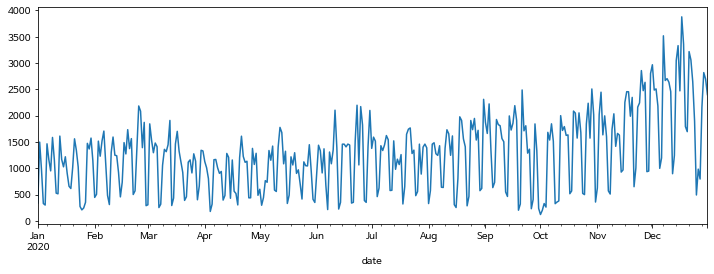

In [ ]:
data[data["year"]==2020].groupby("date")["message"].count().plot(figsize=(12,4))

요일별 대화 빈도수

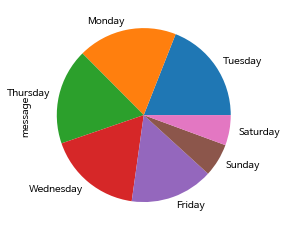

In [ ]:
data[data["year"]==2020].groupby("weekday")["message"].count().sort_values(ascending=False).plot(kind="pie")

시간별 대화 빈도수

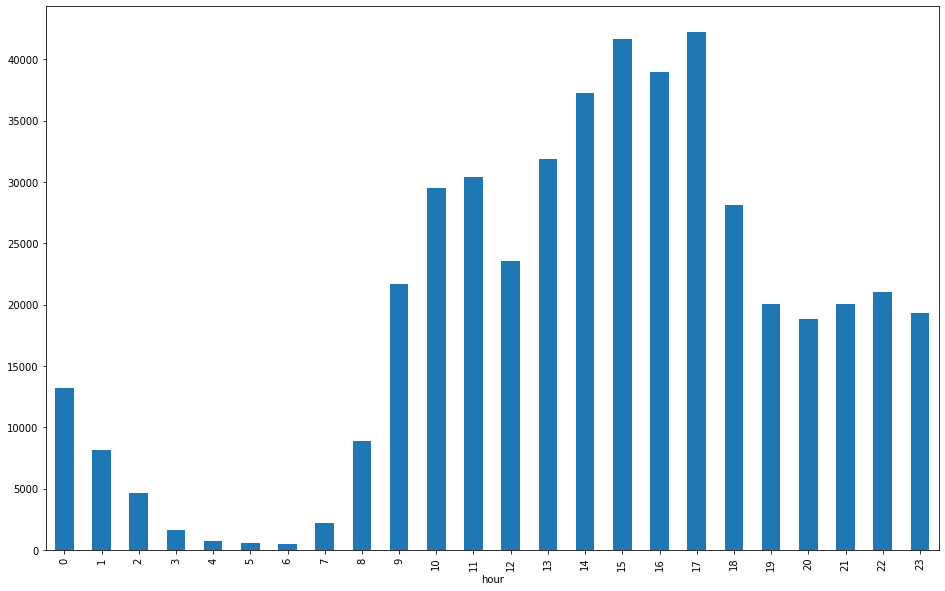

In [ ]:
data[data["year"]==2020].groupby("hour")["message"].count().plot(kind="bar",figsize=(16,10))

유저별 대화 빈도수 시각화

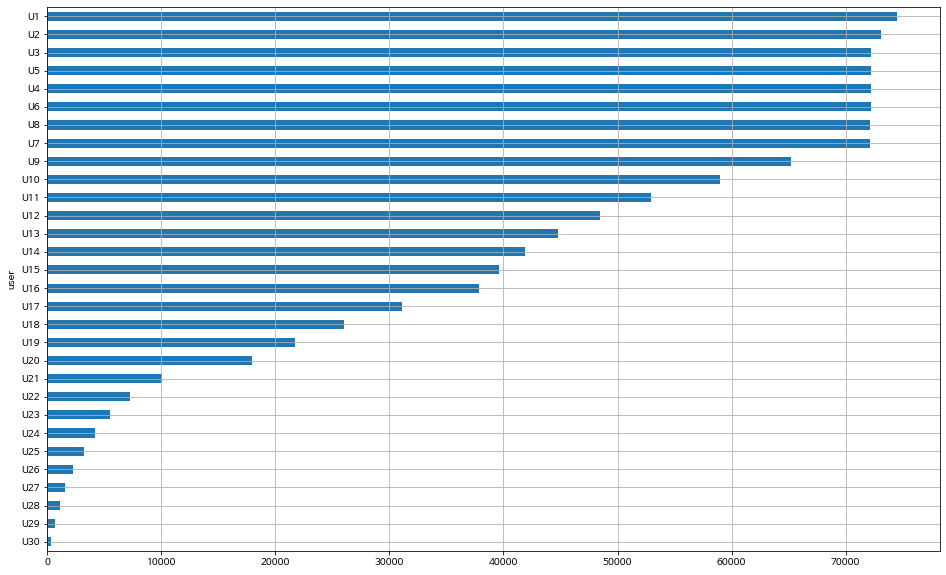

In [ ]:
data.groupby("user")["message"].count().sort_values(ascending=True).plot(kind="barh",grid=True, figsize=(16,10))

데이터 정제후 top50 그래프

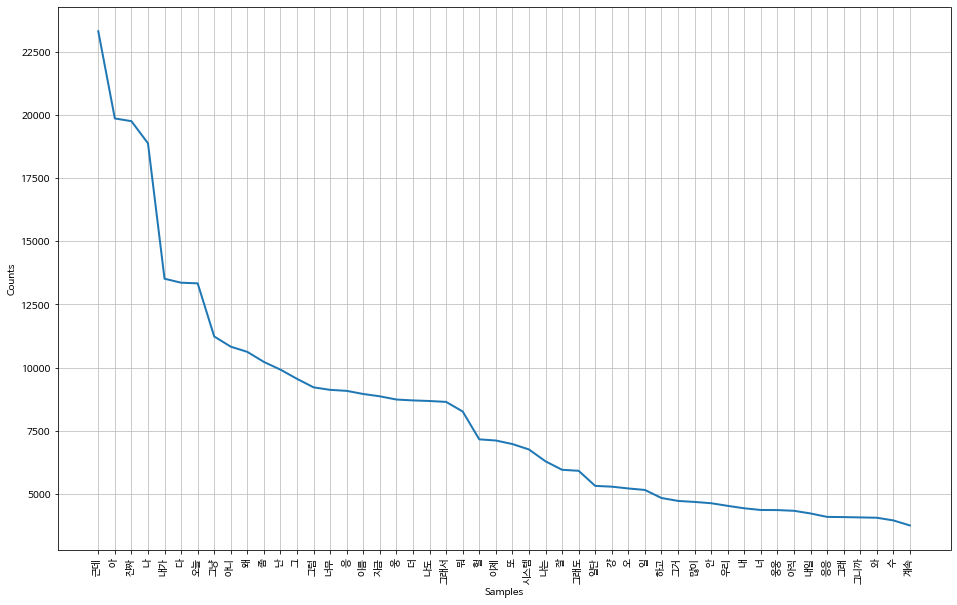

In [ ]:
tokens = [token for msg in data["message"] for token in str(msg).split()]
cl_text = nltk.Text(tokens, name='kakao')
plt.rc('font',family='NanumBarunGothic')
plt.figure(figsize=(16,10))
cl_text.plot(50)

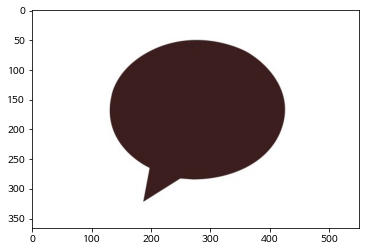

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

icon = Image.open('/content/drive/MyDrive/data/image.jpg')    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon)
mask = np.array(mask)

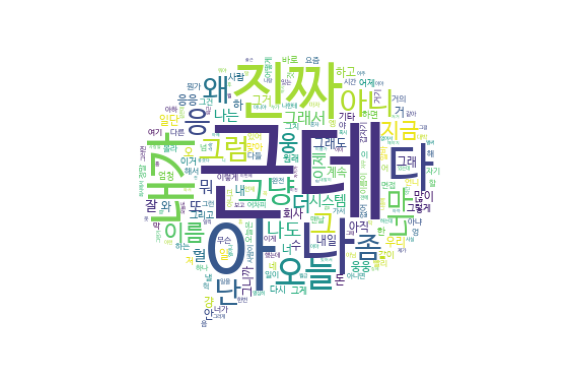

In [ ]:
from wordcloud import WordCloud

wc = cl_text.vocab().most_common(200)


wordcloud = WordCloud(font_path='c:/Windows/Fonts/NanumBarunGothic.ttf',
                      width=800, height=600,
                      background_color='white',
                      mask=mask
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

나이브베이즈 예측 분류

In [ ]:
data.head()

,date,time,message,user,gender,year,month,day,weekday
0,2020-10-07,13:18:00,여러 명 같이 하나보네,U1,여성,2020,10,7,Wednesday
1,2020-10-07,13:19:00,응 한 10명,U3,여성,2020,10,7,Wednesday
2,2020-10-07,13:19:00,프로그램 다운이 안 됐대,U4,여성,2020,10,7,Wednesday
3,2020-10-07,13:19:00,아,U5,남성,2020,10,7,Wednesday
4,2020-10-07,13:19:00,강제로 쉬는 시간,U6,여성,2020,10,7,Wednesday


In [ ]:
df_X=data.message
df_Y=data.gender

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(df_X, df_Y, train_size=0.8, test_size=0.2, random_state=123)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tdmvector = CountVectorizer()
X_train_tdm = tdmvector.fit_transform(train_X)
print(X_train_tdm.shape)

(883047, 646767)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_tdm)
print(X_train_tdm.shape)

(883047, 646767)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mod = MultinomialNB()
mod.fit(tfidfv, train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import accuracy_score

# 테스트 데이터 갖고오기
X_test_tdm = tdmvector.transform(test_X)
# 테스트 데이터를 TDM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_tdm)
# TDM을 TF-IDF 행렬로 변환
predicted = mod.predict(tfidfv_test)
# 테스트 데이터에 대한 예측
print('정확도:', accuracy_score(test_Y, predicted))

정확도: 0.8823982388273344
